## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

## Step #1 - Import Libraries

In [3]:
# import libraries

# for data cleaning and exploration
import pandas as pd
import numpy as np

# for preparing, building and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import *

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing customized functions
import sys
import os
 
# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
 
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

# Step #2: Explore and Clean the Data

In [4]:
# load data

filepath = r'..\creditcard.csv' # copy relative file path here
df = pd.read_csv(filepath, sep=',')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# look at the features
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# identify features with null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


<AxesSubplot: >

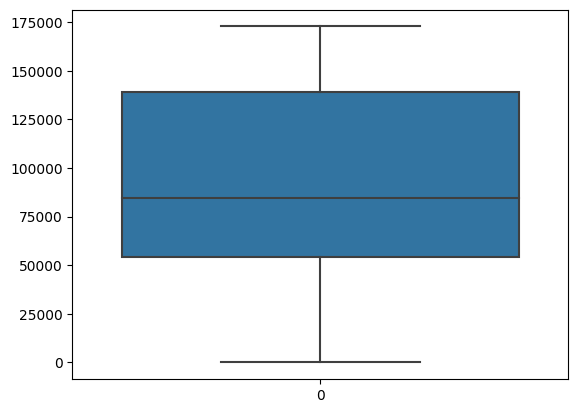

In [10]:
sns.boxplot(data=df['Time'])

<AxesSubplot: >

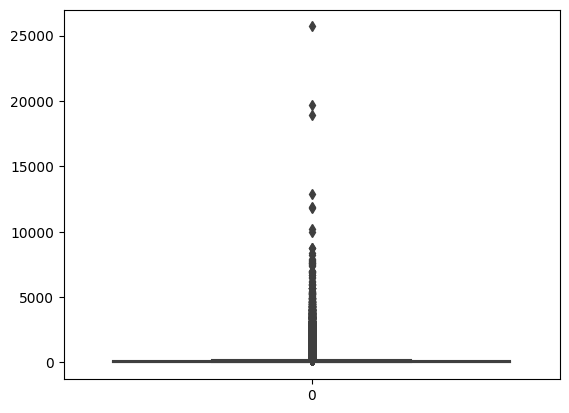

In [11]:
sns.boxplot(data=df['Amount'])

In [12]:
df['Amount'] = np.log(df['Amount'])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Amount', ylabel='Count'>

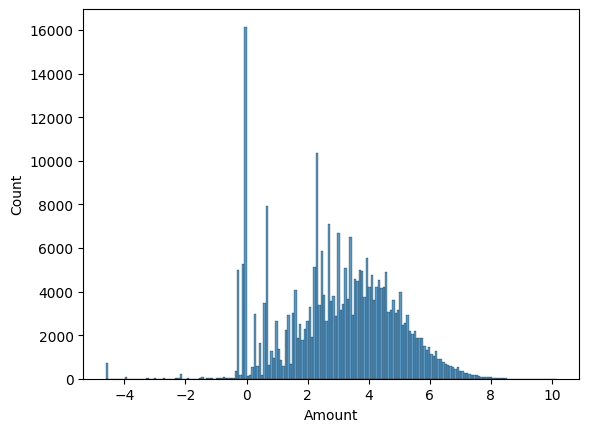

In [13]:
sns.histplot(df['Amount'])

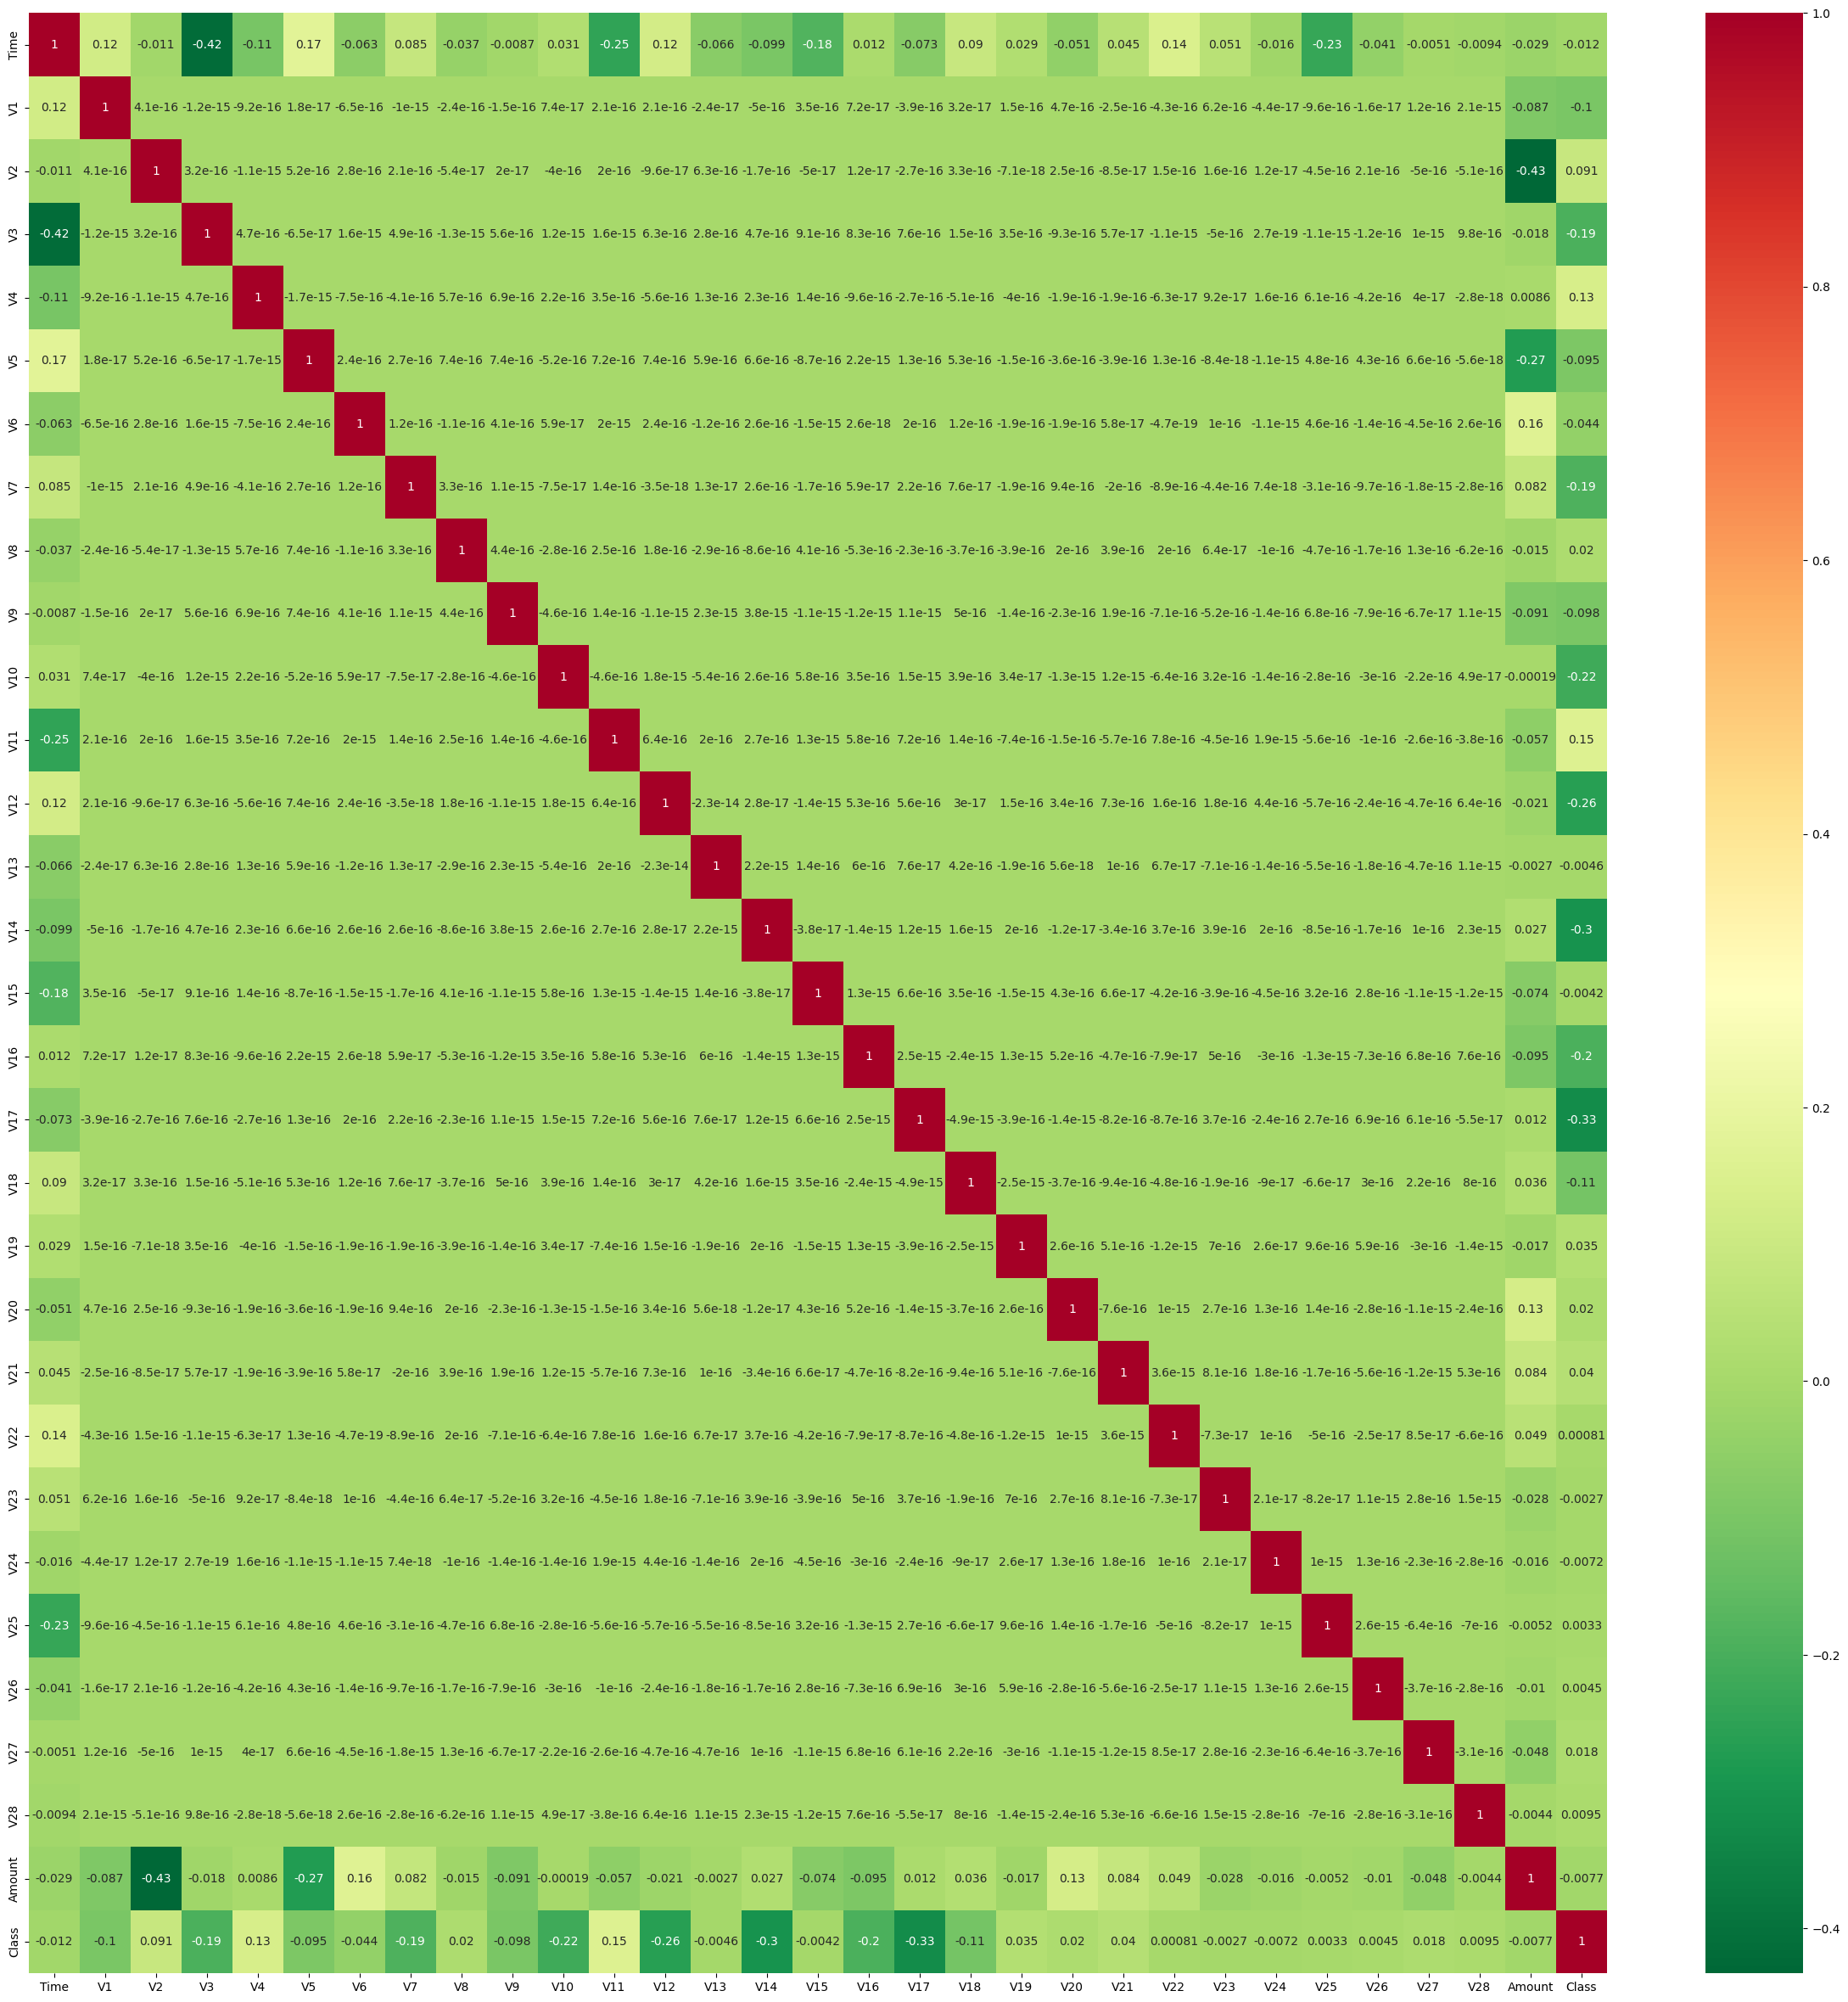

In [14]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Class"])>0]
plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [15]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [16]:
df = clean_dataset(df) # to deal with sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_13028\1442344577.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


# Step #4: Split Training and Test Datasets

In [17]:
X = df.loc[:,:'Amount'].to_numpy()
y = df.loc[:,'Class'].to_numpy()

In [18]:
def split_data(data, target=None, percent_test=0.2, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [19]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (226385, 30)
X_test shape: (56597, 30)
y_train shape: (226385,)
y_test shape: (56597,)


In [20]:
# df_train, df_test = split_data(df, 0.2, dtype='df')

In [21]:
# X_train = df_train.loc[:,:'Amount']
# X_test = df_test.loc[:,:'Amount']
# y_train = df_train.loc[:,'Class']
# y_test = df_test.loc[:,'Class']

# print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'y_test shape: {y_test.shape}')

# Step #5: Transform the Data

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### tried to scale only Time and Amount

In [23]:
# X_train['Time']

In [24]:
# scaler = StandardScaler()

# # scale time
# scaler.fit(X_train['Time'].reshape(-1, 1))

# X_train['Time'] = scaler.transform(X_train['Time'].reshape(-1, 1))
# X_test['Time'] = scaler.transform(X_test['Time'].reshape(-1, 1))

# # scale amount
# scaler.fit(X_train['Amount'].reshape(-1, 1))

# X_train['Amount'] = scaler.transform(X_train['Amount'].reshape(-1, 1))
# X_test['Amount'] = scaler.transform(X_test['Amount'].reshape(-1, 1))

In [25]:
X_train[:,0].shape

(226385,)

In [26]:
train_time = X_train[:,0].reshape(-1,1)
train_time.shape
type(train_time)

numpy.ndarray

In [27]:
test_time = X_test[:,0].reshape(-1,1)
test_time.shape

(56597, 1)

In [28]:
scaler.fit(X_train[:,0]).shape

ValueError: Expected 2D array, got 1D array instead:
array=[ 31735.  74960. 147429. ...  69931.  64799. 149606.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaler = StandardScaler()

# scale time
scaler.fit(train_time)

train_time = scaler.transform(train_time)
test_time = scaler.transform(test_time)

# # scale amount
# scaler.fit(X_train[:,-2])

# X_train[:,-1] = scaler.transform(X_train[:,-1])
# X_test[:,-1] = scaler.transform(X_test[:,-1])

In [ ]:
np.concatenate(X_train,train_time)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,31735.0,1.481495,-0.267244,-0.393097,-0.775907,-0.351496,-1.110541,-0.002087,-0.408309,-1.193346,...,0.115169,0.164158,0.433039,-0.233275,-0.058406,0.875545,-0.055654,-0.026479,-0.001861,2.708050
1,74960.0,-1.809917,1.100790,-0.271717,-0.609591,2.270166,3.394813,-0.446743,1.774132,-1.599479,...,-0.221222,0.002975,-0.633259,-0.122533,1.019617,0.487634,0.758288,-0.409633,-0.187172,-0.328504
2,147429.0,-0.844347,0.786319,1.370879,-0.638844,0.937812,-1.095239,1.059950,-0.246917,-0.758563,...,0.090636,-0.247638,-0.752444,-0.270982,0.082501,0.539643,0.326840,-0.046443,0.050717,-0.116534
3,144251.0,-1.207086,0.006297,0.673928,-2.685973,-1.790788,-0.262280,-0.276707,0.206131,-1.993164,...,-0.803711,-0.006729,0.182638,-0.079681,0.033407,-0.177649,-0.242621,-0.569971,-0.010778,4.661456
4,118733.0,1.999418,-1.217764,0.022861,-0.940397,-0.949286,0.980598,-1.630678,0.426989,0.372575,...,-0.103767,0.348539,1.217593,0.349478,-1.010316,-0.662730,-0.134365,0.096989,-0.045567,2.052841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226380,170478.0,-2.630289,1.302469,1.309084,-0.952219,-0.340534,0.065595,-0.867857,-2.481594,0.609986,...,0.204381,-1.084165,1.287270,-0.120946,0.007659,0.812571,-0.180866,-0.569069,-0.192766,2.459589
226381,14029.0,-1.392495,0.648354,2.773889,3.196665,-0.600547,1.236008,0.305347,0.093096,1.202625,...,0.156233,-0.353657,-0.058054,0.177994,-0.005416,0.032830,0.236688,0.270658,-0.006230,4.919251
226382,69931.0,1.047815,-1.452348,0.119007,0.037259,0.562548,4.842204,-1.869335,1.275024,0.504713,...,-0.230616,-0.422263,-0.635346,-0.143210,1.006990,0.565974,-0.222793,0.116490,0.055531,4.767289
226383,64799.0,1.233731,0.156315,-0.213069,0.755353,0.274865,0.019644,0.081687,0.017775,-0.104505,...,-0.083358,0.010678,-0.041039,-0.270730,-0.841366,0.782591,-0.274070,-0.000569,0.001447,3.399863


In [ ]:
train_time

array([[-1.33039625],
       [-0.41949937],
       [ 1.10766746],
       ...,
       [-0.5254774 ],
       [-0.63362599],
       [ 1.15354421]])

In [ ]:
scaler.fit(X_train[:,0]).shape

AttributeError: 'StandardScaler' object has no attribute 'shape'

In [ ]:
# X_train[:,0] = X_train_time
# X_test[:,0] = X_test_time.reshape(-1, 1)
# X_train[:,-1] = X_train_amount.reshape(-1, 1)
# X_test[:,-1] = X_test_amount.reshape(-1, 1)

ValueError: could not broadcast input array from shape (226385,1) into shape (226385,)

# Step #6: Instantiate the Model, Fit it to the Training Data, Evaluate

In [60]:
def IFPE_Classifier(X_train, y_train, X_test, y_test, classifier):
    
    # instantiate the model
    if classifier == 'gnb':
        from sklearn.naive_bayes import GaussianNB
        clf = GaussianNB()
    elif classifier == 'svm':
        from sklearn import svm
        clf = svm.SVC(kernel='linear',random_state=0)
    elif classifier == 'dt':
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier(random_state=0)
    elif classifier == 'lr':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression(random_state=0)
    elif classifier =='sgd':
        from sklearn.linear_model import SGDClassifier
        clf = SGDClassifier(loss="hinge", random_state=0)
    elif classifier == 'rf':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(random_state=0, n_jobs=-1)

    # fit the model
    clf.fit(X_train, y_train)

    # predict the response for the test dataset
    y_pred = clf.predict(X_test)

    # evaluate the model
    # import customized functions
    import sys
    import os
    from sklearn.metrics import confusion_matrix
 
    # adding python_functions subfolder to the system path
    var = os.environ['PYTHONPATH']
    sys.path.insert(0, var)
    
    # importing the make_confusion_matrix
    from confusion_matrix import make_confusion_matrix
    # (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

    cf_matrix = confusion_matrix(y_test, y_pred)

    # calling make_confusion_matrix function
    result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

    # return dataframe with key stats
    # test_prob = clf.predict_proba(X_test)
    model_comparison = pd.DataFrame(
        # {'log_loss': log_loss(y_test, test_prob),
        # 'roc_auc_score': roc_auc_score(y_test, test_prob),
        # 'average_precision': average_precision_score(y_test, test_prob),
        {'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'F1 score' : f1_score(y_test, y_pred)
        }, index = [str(classifier)]
    )
    
    return result, model_comparison

### Logistic Regression

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


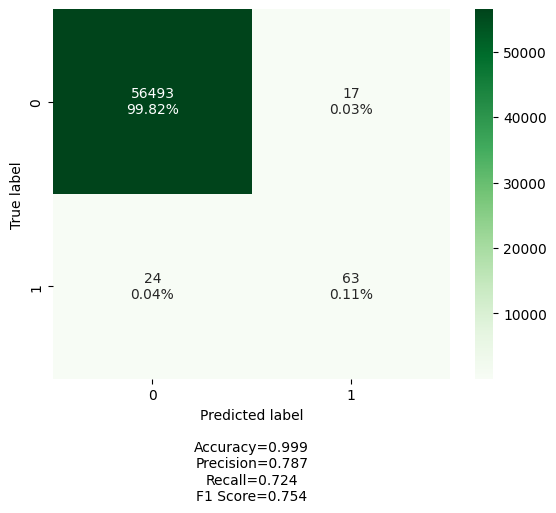

In [50]:
result, model_comparison_lr = IFPE_Classifier(X_train, y_train, X_test, y_test, 'lr')

### Naive Bayes

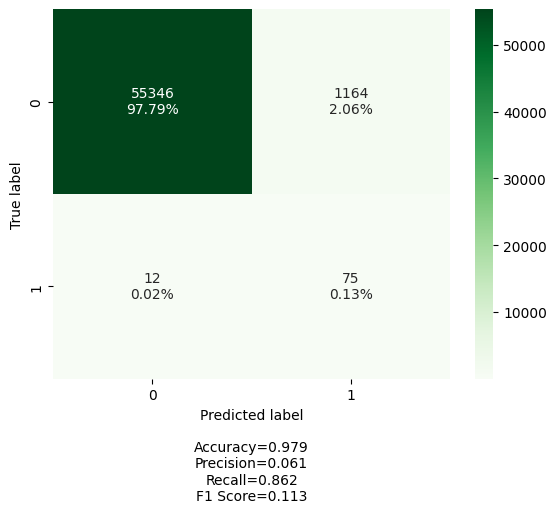

In [54]:
result, model_comparison_nb = IFPE_Classifier(X_train_scaled, y_train, X_test_scaled, y_test, 'gnb')

In [58]:
model_comparison = pd.concat([model_comparison_lr,model_comparison_nb])
model_comparison

,accuracy,precision,recall,F1 score
lr,0.999276,0.787500,0.724138,0.754491
gnb,0.979222,0.060533,0.862069,0.113122


### SVM

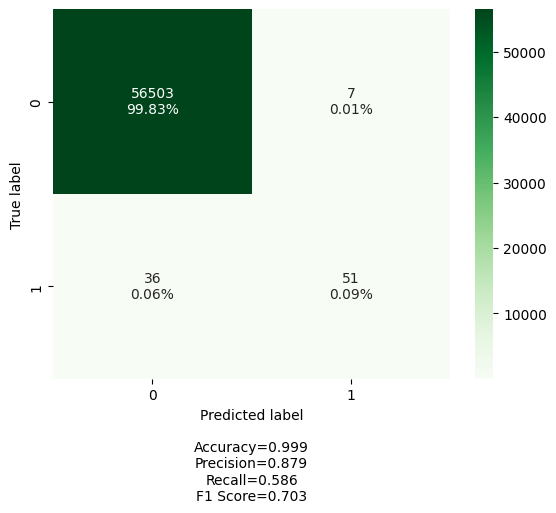

In [61]:
# SVM took too long to train, try SGDClassifier instead

result, model_comparison_svm = IFPE_Classifier(X_train_scaled, y_train, X_test_scaled, y_test, 'sgd')

### Decision Trees

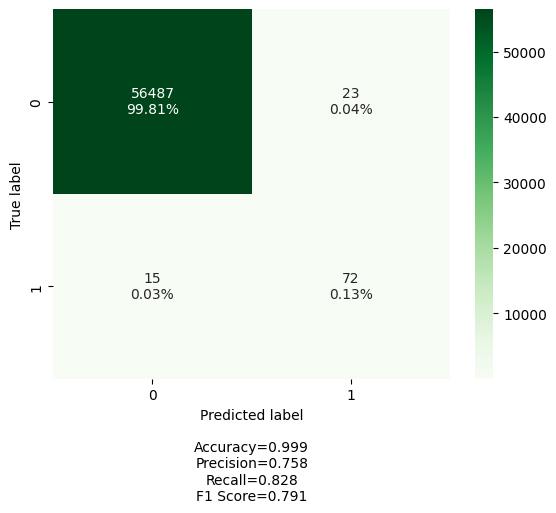

In [62]:
result, model_comparison_dt = IFPE_Classifier(X_train_scaled, y_train, X_test_scaled, y_test, 'dt')

### Random Forest

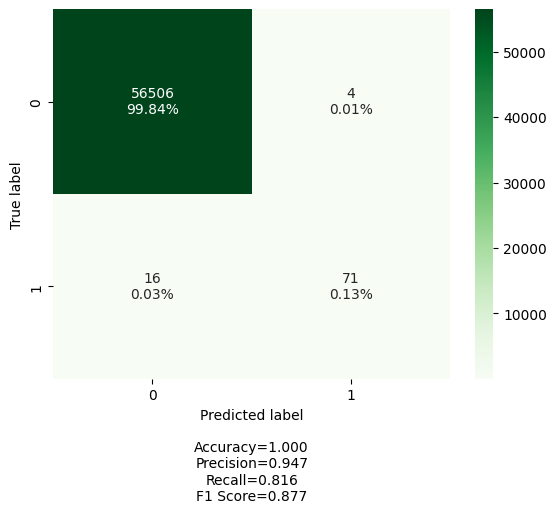

In [63]:
result, model_comparison_rf = IFPE_Classifier(X_train_scaled, y_train, X_test_scaled, y_test, 'rf')

In [30]:
parameter_candidates = [
  {'n_estimators': [100,150.200], 
  # 'criterion': ['squared_error', 'absolute_error']
  'max_depth': [2,4,6],
  # 'min_samples_split': [2,3],
  # 'min_samples_leaf': [1,2],
  # 'min_weight_fraction_leaf': [0,0.5,0.75],
  # 'max_features': ['sqrt', 'log2', 'auto'],
  # # 'max_leaf_nodes': [],
  # # 'min_impurity_decrease':[],
  # # 'bootstrap': [True,False],
  # # 'oob_score': [True,False],
  # # 'n_jobs': [],
  # # 'verbose': [],
  # # 'ccp_alpha': [],
  # # 'max_samples': []
  },
]

In [33]:
# creating random forest regressor
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)

# Create a gridsearch object with the regressor and parameter candidates
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
gridsearch_RFC = RandomizedSearchCV(estimator=RFC, param_distributions=parameter_candidates, n_jobs=-1)

# Train the gridsearch on data's feature and target data
gridsearch_RFC.fit(X_train_scaled, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
                   param_distributions=[{'max_depth': [2, 4, 6],
                                         'n_estimators': [100, 150.2]}])

In [34]:
# identify the best model

best_RFC = gridsearch_RFC.best_estimator_
best_RFC

RandomForestClassifier(max_depth=6, random_state=0)

In [37]:
# make predictions on the test set
y_pred = best_RFC.predict(X_test_scaled)

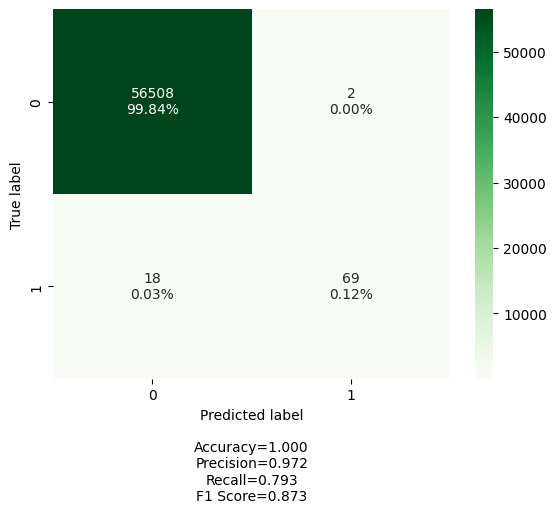

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

In [64]:
model_comparison = pd.concat([model_comparison_lr,model_comparison_nb,model_comparison_svm,model_comparison_dt,model_comparison_rf])
model_comparison

,accuracy,precision,recall,F1 score
lr,0.999276,0.787500,0.724138,0.754491
gnb,0.979222,0.060533,0.862069,0.113122
sgd,0.999240,0.879310,0.586207,0.703448
dt,0.999329,0.757895,0.827586,0.791209
rf,0.999647,0.946667,0.816092,0.876543


In [66]:
model_comparison.sort_values(by='F1 score', ascending=False)

,accuracy,precision,recall,F1 score
rf,0.999647,0.946667,0.816092,0.876543
dt,0.999329,0.757895,0.827586,0.791209
lr,0.999276,0.787500,0.724138,0.754491
sgd,0.999240,0.879310,0.586207,0.703448
gnb,0.979222,0.060533,0.862069,0.113122


# Next Steps

1. Figure out how to scale individual columns and avoid shape problems
2. Figure out how to create function and/or add to IFPE_Classifier function to automate hyperparameter search 
3. Write a function that will create a dataframe showing the key stats for all the models to help decide which one is the best